<a href="https://colab.research.google.com/github/Wonny0120/Seongwon-portpolio/blob/main/starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.5.2

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [ ]:
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20000 non-null  int64         
 1   date           20000 non-null  datetime64[ns]
 2   bedrooms       20000 non-null  int64         
 3   bathrooms      20000 non-null  float64       
 4   sqft_living    20000 non-null  int64         
 5   sqft_lot       20000 non-null  int64         
 6   floors         20000 non-null  float64       
 7   waterfront     20000 non-null  int64         
 8   view           20000 non-null  int64         
 9   condition      20000 non-null  int64         
 10  grade          20000 non-null  int64         
 11  sqft_above     20000 non-null  int64         
 12  sqft_basement  20000 non-null  int64         
 13  yr_built       20000 non-null  int64         
 14  yr_renovated   20000 non-null  int64         
 15  zipcode        2000

In [ ]:
X = housing.drop(columns=["price"])
y = housing["price"]

In [ ]:
housing["date"] = pd.to_datetime(housing["date"], format="%Y%m%dT%H%M%S", errors="coerce")
housing["year"] = housing["date"].dt.year
housing["month"] = housing["date"].dt.month

housing["log_price"] = np.log1p(housing["price"])

In [ ]:
housing["size_tier"] = pd.qcut(housing["sqft_living"], 4, labels=["small", "medium", "large", "luxury"])
housing["grade_tier"] = pd.cut(housing["grade"],
                          bins=[0, 6, 8, 10, 13],
                          labels=["low", "mid", "high", "very_high"])
housing["age"] = housing["year"] - housing["yr_built"]
housing["age_tier"] = pd.cut(housing["age"], bins=[-1, 20, 50, 100, 200], labels=["new", "mid", "old", "very_old"])
housing["renovated"] = (housing["yr_renovated"] > 0).astype(int)


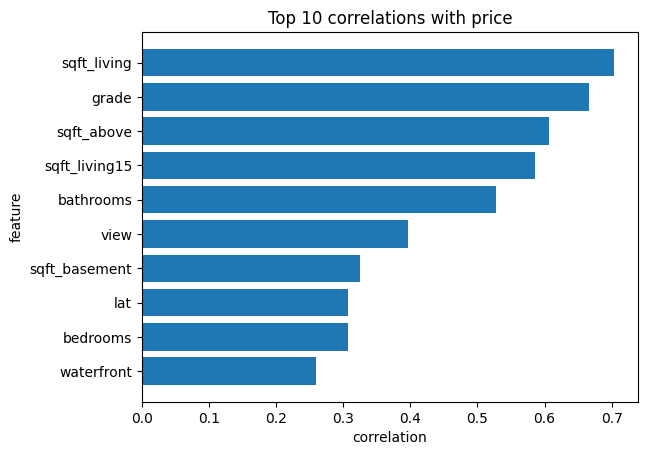

In [ ]:
num_cols = [
    "bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
    "condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated",
    "lat","long","sqft_living15","sqft_lot15","year","month","age","renovated"
]

corr = housing[num_cols + ["price"]].corr(numeric_only=True)["price"].drop("price").sort_values()

top = corr.tail(10)
plt.figure()
plt.barh(top.index, top.values)
plt.title("Top 10 correlations with price")
plt.xlabel("correlation")
plt.ylabel("feature")
plt.show()